# Bases de Traitement d'Images : TP 5
# Filtrage non-linéaire

Dans le TP précédent, nous avons vu le filtrage linéaire en tant que
produit de convolution entre l'image et un filtre. La convolution étant
une opération linéaire, elle est inversible.\
Dans ce TP, nous nous pencherons sur deux types de filtrage non
linéaire, les filtres d'ordre et la morphologie mathématique.

## I. Filtres d'ordre

Pour chaque pixel, un filtre linéaire effectue une combinaison linéaire
des pixels de son voisinage.\
Un filtre d'ordre sélectionne un seul pixel du voisinage selon un
critère donné. Les filtres d'ordre basiques, pour un voisinage carré de
taille $3\times3$ sont :

-   le filtre *min*, qui renvoie la valeur du pixel le plus
    faible parmi les neuf voisins ;

-   le filtre *max*, qui renvoie la valeur du pixel le plus
    grande parmi les neuf voisins ;

-   le filtre *médian*, qui renvoie la valeur médiane des pixels
    du voisinage.

En privilégiant les valeurs faibles, le filtre *min* aura
tendance à noircir l'image, tandis que le filtre *max* la
blanchira. De plus, ces deux filtres ont tendances à uniformiser des
petites régions.

Voici un exemple de filtrage *min* et *max* sur l'image
Lena, pour un voisinage $5\times5$ :

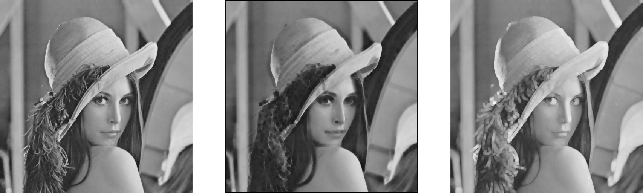

### Application

Les filtres *min* et *max* étant peu intéressants, nous
nous intéresserons uniquement au filtre médian.
Ce dernier se trouve dans la bibliothèque *signal* de *SciPy*.

1.  Ouvrez les images *lena$\_$poivresel.png* et *lena_bruitblanc.png*.
    Visualisez-les, puis     filtrez-là à l'aide de la commande *signal.medfilt2d*.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from scipy import signal, ndimage


plt.rcParams['image.cmap'] = 'gray'


In [2]:
lena_poivre_sel = plt.imread("lena_poivresel.png")
lena_bruitblanc = plt.imread("lena_bruitblanc.png")

lena_ps_med = signal.medfilt2d(lena_poivre_sel, kernel_size=9)
lena_bb_med = signal.medfilt2d(lena_bruitblanc, kernel_size=9)


#Bruit poivre sel :  pixels aleatoires mis à 1 ou 0
#Bruit blanc : valeur d'un pixel mis à une valeur suivant une gaussienne





Text(0.5, 1.0, 'lena bruit blanc median')

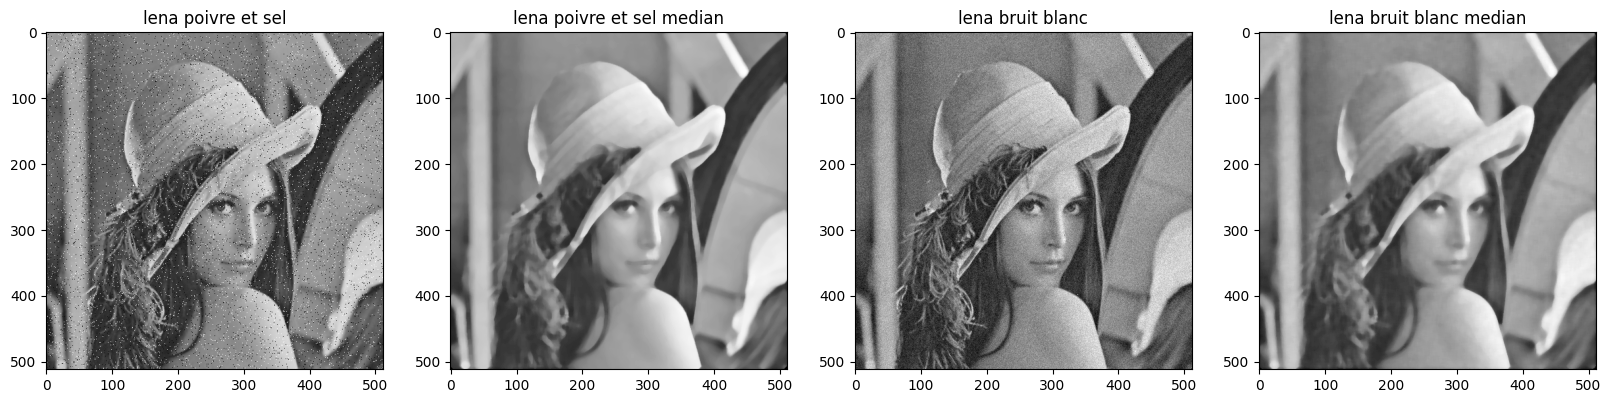

In [3]:
plt.figure(figsize=(20,20))

plt.subplot(141)
plt.imshow(lena_poivre_sel)
plt.title("lena poivre et sel")

plt.subplot(142)
plt.imshow(lena_ps_med)
plt.title("lena poivre et sel median")

plt.subplot(143)
plt.imshow(lena_bruitblanc)
plt.title("lena bruit blanc")


plt.subplot(144)
plt.imshow(lena_bb_med)
plt.title("lena bruit blanc median")

2.  Comparez le résultat de ce filtre avec un filtre passe-bas
    uniforme<a name="rev1"></a><a href="#1">[1]</a>, et commentez.

In [4]:
h1 = np.ones((9,9))


lena_ps_uni = signal.convolve2d(lena_poivre_sel,h1)
lena_bb_uni = signal.convolve2d(lena_bruitblanc,h1)


Text(0.5, 1.0, 'lena bruit blanc uniforme')

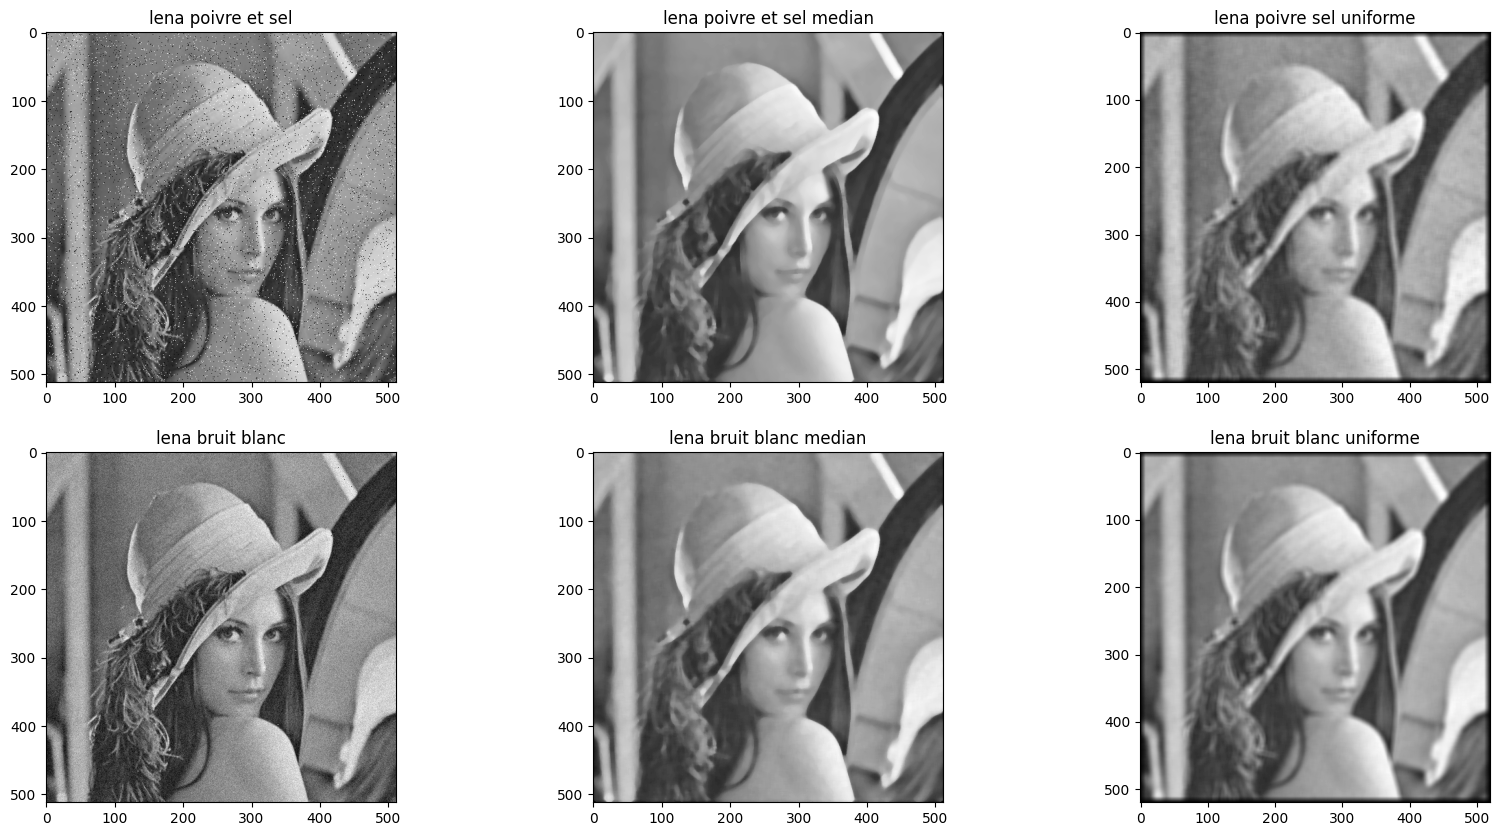

In [5]:
plt.figure(figsize=(20,10))

plt.subplot(231)
plt.imshow(lena_poivre_sel)
plt.title("lena poivre et sel")

plt.subplot(232)
plt.imshow(lena_ps_med)
plt.title("lena poivre et sel median")

plt.subplot(233)
plt.imshow(lena_ps_uni)
plt.title("lena poivre sel uniforme")


plt.subplot(234)
plt.imshow(lena_bruitblanc)
plt.title("lena bruit blanc")


plt.subplot(235)
plt.imshow(lena_bb_med)
plt.title("lena bruit blanc median")

plt.subplot(236)
plt.imshow(lena_bb_uni)
plt.title("lena bruit blanc uniforme")



#pour filtrer un bruit blanc , il est mieux d'utiliser un filtre passe bas uniforme;
#pour le bruit poivre et sel, le filtre median est plus adapté

3. Étudiez l'influence de la taille sur le filtre médian et le filtre passe-bas uniforme.

In [6]:
#filtre median : on prend un voisinnage plus grand, puisque les pixels auront à peu pres les memes voisins, on aura à peu pres la meme mediane pour chaque pixel, on a une sorte de flou
#filtre passe-bas uniforme : puisqu'on augmente la taille, la moyenne est faite sur encore plus d'echantillons donc le flou augmente

## II. Morphologie mathématique

La morphologie mathématique est utilisée dans de nombreux algorithmes de
traitement d'images, et constitue une discipline à part entière. Elle
permet de sélectionner des zones pertinentes dans une image. Nous
verrons ici uniquement la morphologie mathématique binaire ; on parle de
morphologie mathématique ensembliste, par opposition à la morphologie
mathématique fonctionnelle, adaptée aux images en niveaux de gris.\
La morphologie mathématique est un ensemble de traitements s'appuyant
sur un *élément structurant*, c'est-à-dire une structure géométrique
simple. Quelques exemples d'éléments structurants :

<div align="center">Cercle de rayon  1</div>
  $$\begin{aligned}
  SE1=\begin{bmatrix}
  0 & 1 & 0 \\
  1 & 1 & 1 \\
  0 & 1 & 0 \\
  \end{bmatrix}, \nonumber\end{aligned}$$

<div align="center">Carré </div>
  $$\begin{aligned}
  SE2=\begin{bmatrix}
  1 & 1 & 1 \\
  1 & 1 & 1 \\
  1 & 1 & 1 \\
  \end{bmatrix}, \nonumber\end{aligned}$$

<div align="center">Diagonal</div>
  $$\begin{aligned}
  SE3=\begin{bmatrix}
  1 & 1 & 1 \\
  1 & 1 & 0 \\
  1 & 0 & 0 \\
  \end{bmatrix}. \nonumber\end{aligned}$$

\
Avec un élément structurant, on définit deux opérations de base,
l'érosion et la dilatation. Pour chacune de ces opérations, l'élément
structurant sert de modèle local, appliqué successivement sur chaque
pixel à 1 de l'image binaire.

**L'érosion** d'une image binaire $F$ créé une nouvelle image binaire
$F^\prime$, contenant les pixels $x[i,j]$ de $F$ dont tous les voisins
recouverts par l'élément structurant $SE$ centré sur le pixel $x[i,j]$
appartiennent à l'image F. Les pixels dont certains voisins
n'appartiennent pas à l'image ne seront pas conservés. L'érosion va
supprimer des pixels.

Mathématiquement, on peut écrire $$\begin{aligned}
    F^\prime &= {x[i,j]/SE_{[i,j]} \subset F } \nonumber\end{aligned}$$
avec $SE_{[i,j]}$ l'élément structurant centré sur le pixel $x[i,j]$.

**La dilatation** d'une image binaire $F$ créé une nouvelle image
binaire $F^\prime$, contenant tous les pixels $x[i,j]$ de $F$ recouvert
au moins une fois lorsque l'élément structurant $SE$ parcourant
l'ensemble des pixels à 1 de $F$. Un pixel à 0 proche d'un pixel à 1
sera ainsi inclus dans la nouvelle image $F^\prime$. La dilatation va
ajouter des pixels.

Mathématiquement, on peut écrire $$\begin{aligned}
    F^\prime &= {x[i,j]/\breve{SE}^\prime_{[i,j]} \cap F \neq \emptyset} \nonumber\end{aligned}$$
avec $\breve{SE}^\prime_{[i,j]}$ le symétrique par rapport à son point
centrale de l'élément structurant centré sur le pixel $x[i,j]$.

Voici une illustration<a name="rev2"></a><a href="#2">[2]</a> avec un élément structurant carré
$3\times3$.
L'image originelle est à gauche, au centre l'image dilatée, à droite l'image érodée.
Les pixels gris indiquent quels sont les pixels ajoutés et supprimés, respectivement.

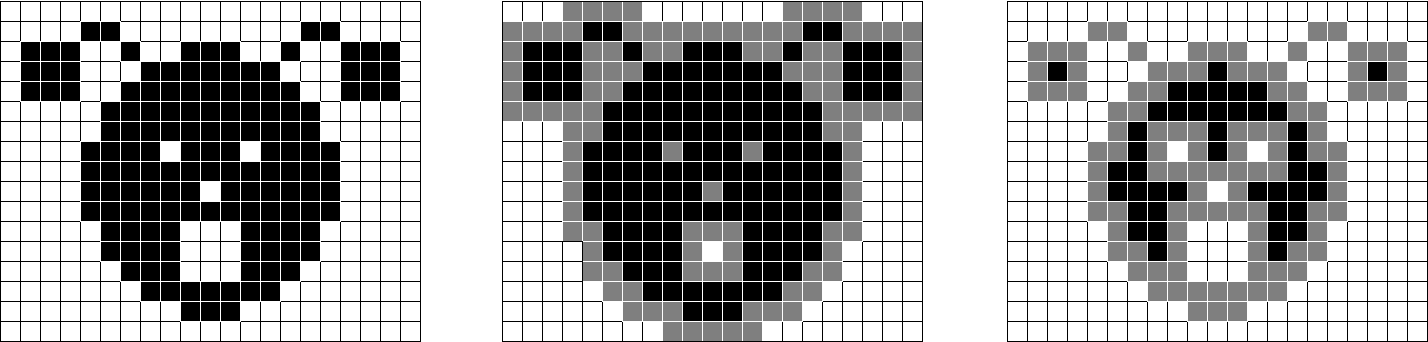

Les deux opérations basiques d'érosion et de dilatation peuvent être
enchaînées pour obtenir différents résultats. Citons notamment :

- **l'ouverture**, qui est une érosion suivie d'une dilatation. Elle
permet entre autres de supprimer les détails de l'image ;

- **la fermeture**, qui est une dilatation suivie d'une érosion. Elle
permet entre autres de « boucher » les trous d'une image.

###  Applications

1.  Ouvrez l'image *circuit$\_$nb.png*. Binarisez-là en
    choisissant un seuil manuel d'après l'histogramme.
    Pour les fonctions de Python, le fond doit
    être noir (égal à 0). On peut inverser une image binaire grâce à l'opérateur
    *np.invert()*.\
    Érodez cette image avec l'élément structurant *SE1*. Vous pouvez ensuite tester
    les autres éléments structurants et observer l'impact de la taille et de la
    forme de ce dernier sur le résultat.\
    Les fonctions de morphologie mathématiques se trouvent dans la bibliothèque
    *ndimage* de *Scipy* : *ndimage.binary_erosion* et *ndimage.binary_dilation*.

(array([1.500e+01, 1.440e+02, 4.180e+02, 0.000e+00, 1.459e+03, 1.972e+03,
        0.000e+00, 0.000e+00, 1.416e+03, 0.000e+00, 1.228e+03, 1.232e+03,
        1.384e+03, 0.000e+00, 1.119e+03, 0.000e+00, 0.000e+00, 9.410e+02,
        9.590e+02, 0.000e+00, 1.010e+03, 9.840e+02, 8.740e+02, 0.000e+00,
        8.270e+02, 0.000e+00, 0.000e+00, 7.790e+02, 8.150e+02, 0.000e+00,
        8.110e+02, 7.150e+02, 6.500e+02, 0.000e+00, 7.080e+02, 0.000e+00,
        0.000e+00, 7.060e+02, 7.950e+02, 0.000e+00, 8.790e+02, 8.780e+02,
        9.250e+02, 0.000e+00, 8.830e+02, 0.000e+00, 0.000e+00, 7.860e+02,
        7.180e+02, 0.000e+00, 7.260e+02, 7.430e+02, 7.080e+02, 0.000e+00,
        0.000e+00, 7.380e+02, 0.000e+00, 6.890e+02, 6.610e+02, 0.000e+00,
        6.130e+02, 6.440e+02, 6.340e+02, 0.000e+00, 0.000e+00, 6.720e+02,
        0.000e+00, 7.240e+02, 6.520e+02, 0.000e+00, 6.910e+02, 6.190e+02,
        6.760e+02, 0.000e+00, 0.000e+00, 7.360e+02, 0.000e+00, 6.670e+02,
        5.810e+02, 0.000e+00, 5.940e+0

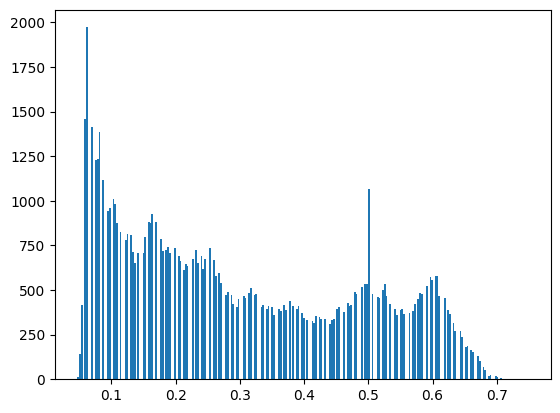

In [7]:
#image binaire = image booleenne donc masque de l'image

circuit = plt.imread("circuit_nb.png").copy()

# plt.imshow(circuit)


plt.hist(circuit.flatten(),bins=256)



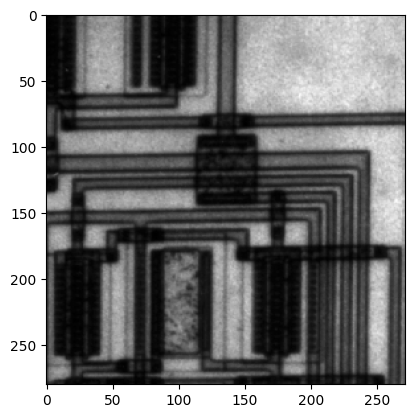

In [8]:
plt.imshow(circuit)

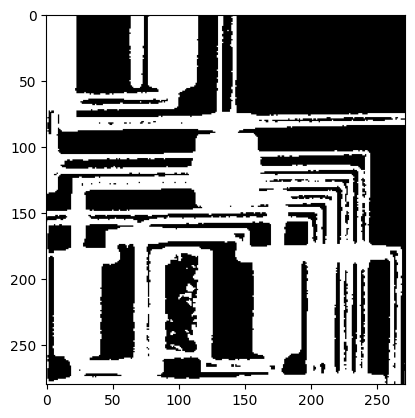

In [9]:
mask = circuit<0.25

plt.imshow(mask)


Text(0.5, 1.0, 'Dilatation morphologique')

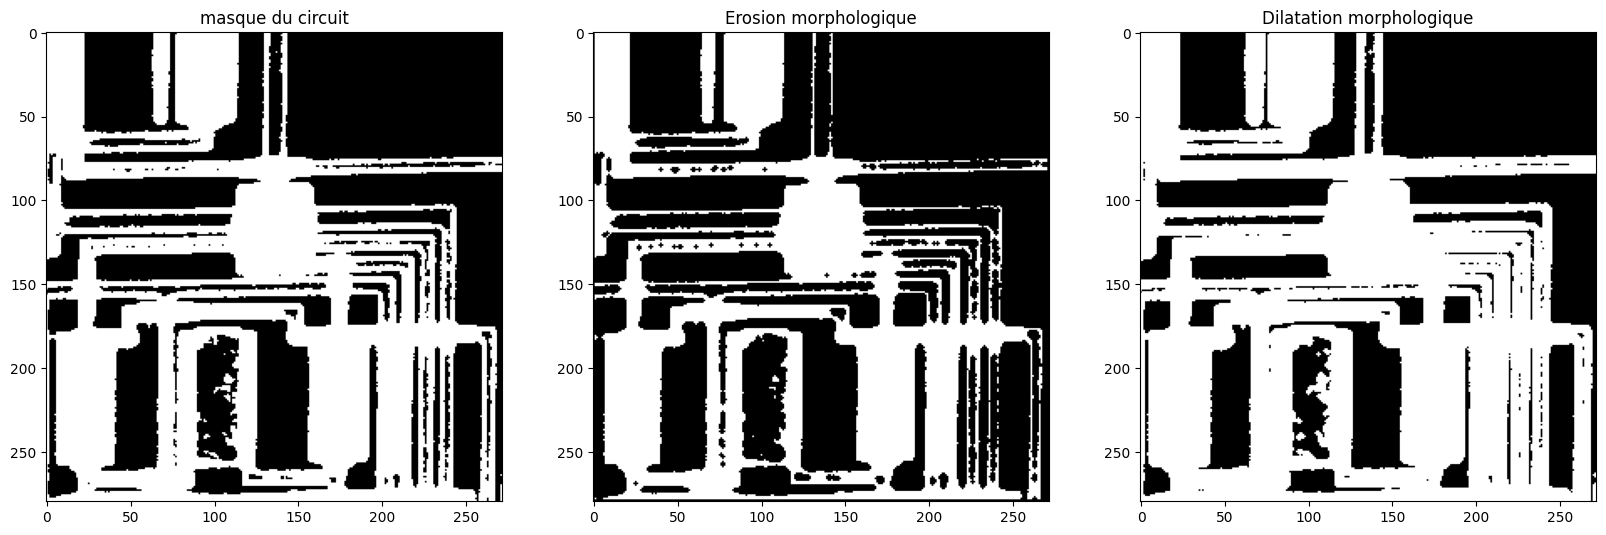

In [10]:
SE1 = np.array([[0,1,0],
                [1,1,1],
                [0,1,0]])

c_ero = ndimage.binary_erosion(mask,SE1)

c_dil = ndimage.binary_dilation(mask,SE1)


plt.figure(figsize=(20,20))

plt.subplot(131)
plt.imshow(mask)
plt.title("masque du circuit")

plt.subplot(132)
plt.imshow(c_ero)
plt.title("Erosion morphologique")

plt.subplot(133)
plt.imshow(c_dil)
plt.title("Dilatation morphologique")







2.  Réalisez les mêmes opérations avec la fonction *ndimage.binary_dilation*.

3.  Comparez l'érosion du fond de cette image avec la dilatation des
    formes de cette même image. Concluez.

In [11]:
#l'erosion aura permis d'augmenter le fond, donc de perdre de l'information
#la dilatation aura permis d'augmenter les formes de l'image, il y'a moins de fond

4.  Vous pouvez reprendre les questions précédentes avec l'image
    *irm$\_$cerveau$\_$binaire.png*.

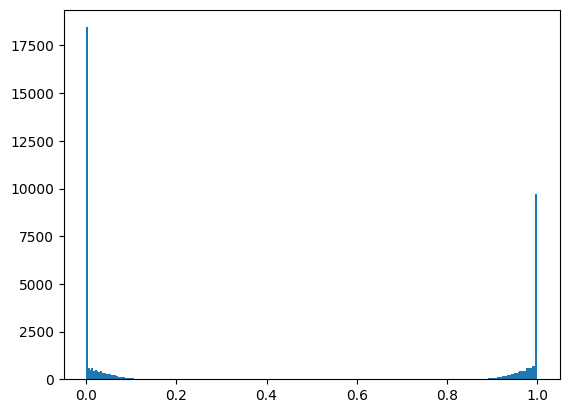

In [35]:
cerveau = plt.imread("irm_cerveau_binaire.png").copy()


plt.hist(cerveau.flatten(), bins=256)

mask_brain = cerveau>0.5
#le fond sur l'image orginal est en noir et la matiere/details en blanc


Text(0.5, 1.0, 'Cerveau dilaté')

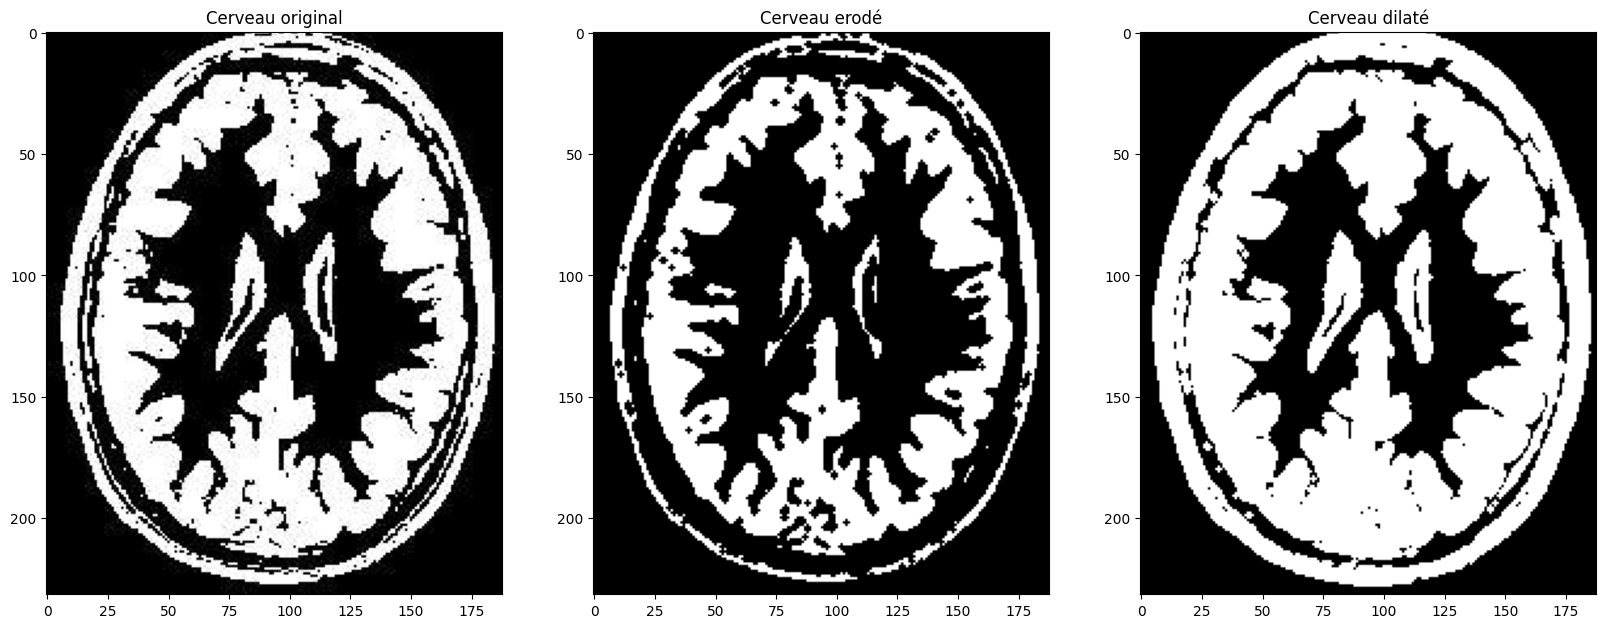

In [36]:
brain_ero = ndimage.binary_erosion(mask_brain,SE1)
brain_dil = ndimage.binary_dilation(mask_brain,SE1)




plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(cerveau)
plt.title("Cerveau original")

plt.subplot(132)
plt.imshow(brain_ero)
plt.title("Cerveau erodé")


plt.subplot(133)
plt.imshow(brain_dil)
plt.title("Cerveau dilaté")


5.  Ouvrez l'image *pearlite$\_$nb.bmp*. Binarisez-là comme dans la
    question 1. Réalisez une ouverture puis une fermeture sur cette
    image. Vous utiliserez un élément structurant carré de taille 9×9.

(array([ 606.,  183.,  157.,  131.,  155.,  173.,  132.,  127.,  149.,
         134.,  152.,  278.,    0.,  135.,  136.,  150.,  136.,  163.,
         148.,  139.,  156.,  153.,  138.,  146.,  168.,  146.,  165.,
         178.,  179.,  153.,  152.,  184.,  183.,  156.,  183.,  191.,
         404.,    0.,  197.,  196.,  184.,  219.,  200.,  226.,  230.,
         223.,  202.,  198.,  233.,  258.,  253.,  216.,  263.,  208.,
         230.,  211.,  255.,  260.,  251.,  251.,  249.,  523.,    0.,
         262.,  288.,  304.,  299.,  275.,  260.,  275.,  332.,  290.,
         291.,  298.,  338.,  311.,  300.,  317.,  328.,  308.,  301.,
         314.,  341.,  335.,  325.,    0.,  292.,  652.,    0.,  316.,
         289.,  351.,  351.,  366.,  328.,  339.,  335.,  364.,  356.,
         347.,  343.,  394.,  384.,  348.,  319.,  368.,  342.,  419.,
         373.,  379.,  398.,  357.,  748.,    0.,  382.,  353.,  364.,
         400.,  353.,  391.,  360.,  392.,  385.,  370.,  418.,  388.,
      

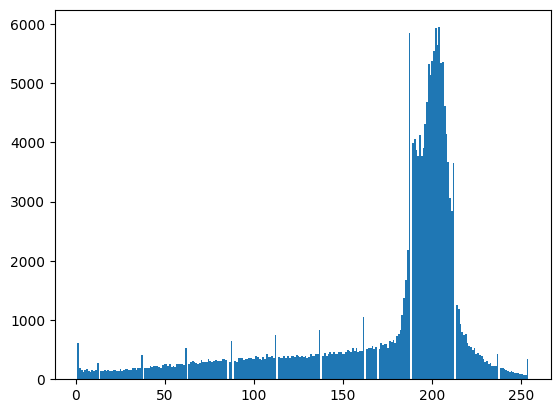

In [21]:
pearlite = plt.imread("pearlite_nb.bmp")

plt.hist(pearlite.flatten(),bins=256)

In [29]:
mask_pearlite = pearlite<175

#on veut que le fond soit en noir, et que les details soient en blanc, quelque soit la couleur de l'image




SE2 = np.ones((9,9))


pearlite_opening = ndimage.binary_opening(mask_pearlite,SE2)
pearlite_closing = ndimage.binary_closing(mask_pearlite,SE2)




Text(0.5, 1.0, 'Pearlite ')

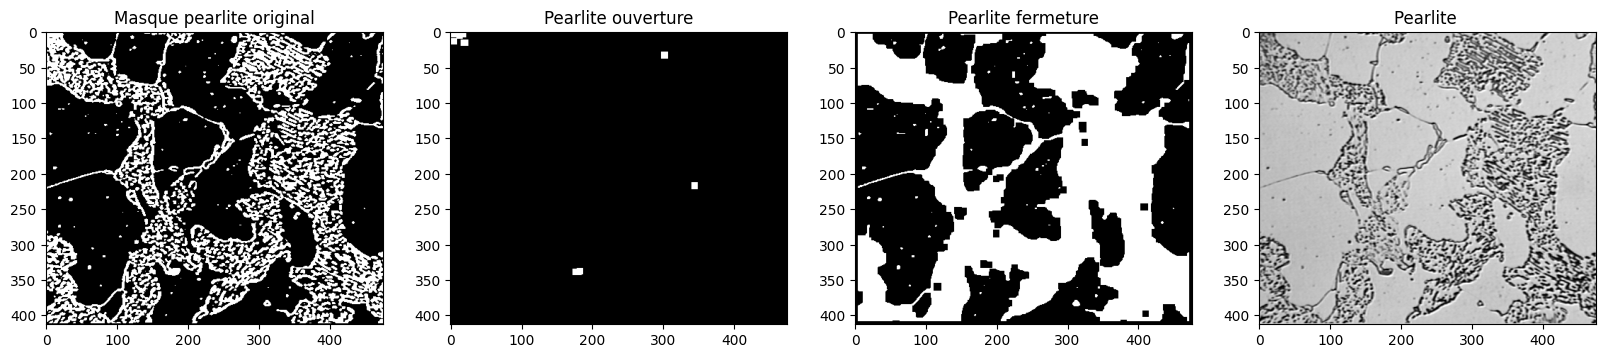

In [32]:
plt.figure(figsize=(20,20))
plt.subplot(141)
plt.imshow(mask_pearlite)
plt.title("Masque pearlite original")

plt.subplot(142)
plt.imshow(pearlite_opening)
plt.title("Pearlite ouverture")

plt.subplot(143)
plt.imshow(pearlite_closing)
plt.title("Pearlite fermeture")

plt.subplot(144)
plt.imshow(pearlite)
plt.title("Pearlite ")





<a name="1"></a><a href="#rev1">[1]</a> : une bonne méthode de comparaison de résultats de filtrage peut
    être de calculer la différence entre l'image originale et l'image
    filtrée.

<a name="2"></a><a href="#rev">[2]</a> : Source :
    [https://fr.wikipedia.org/wiki/Morphologie\_mathématique](https://fr.wikipedia.org/wiki/Morphologie_mathématique)